In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


# Set options to display the entire DataFrame without truncation
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', 200)     # Display all rows
pd.set_option('display.max_colwidth', None) # Display full content of each column
pd.set_option('display.expand_frame_repr', False)  # Don't wrap columns to new lines




In [2]:
import pandas as pd
import requests

# URL of the JSON API with format=json
url = 'https://koumoul.com/data-fair/api/v1/datasets/dpe-v2-logements-neufs/lines?size=10000&format=json'

# Fetch the JSON data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        # Parse the JSON data
        data = response.json()
        
        # Normalize the JSON data to create a flat DataFrame
        df = pd.json_normalize(data['results'])
        
        # # Display the DataFrame
        # df.head(20)
    except ValueError as e:
        print("Error parsing JSON:", e)
else:
    print("Failed to fetch data. Status code:", response.status_code)
    print("Response content:", response.text)


In [5]:
df.head(5)

,Conso_chauffage_dépensier_é_finale,Emission_GES_ECS,Type_énergie_n°1,Type_énergie_n°2,Nom__commune_(BAN),Coût_ECS_énergie_n°2,Emission_GES_chauffage,Date_réception_DPE,Coût_ECS_énergie_n°1,Coût_total_5_usages,Conso_ECS_é_finale,Emission_GES_5_usages,Code_postal_(BAN),Conso_éclairage_é_finale,Coût_refroidissement_dépensier,Coordonnée_cartographique_X_(BAN),Date_fin_validité_DPE,Nombre_niveau_logement,Emission_GES_refroidissement_dépensier,Type_bâtiment,Conso_5_usages_par_m²_é_primaire,Coût_refroidissement,Ubat_W/m²_K,Coût_ECS_dépensier,Coût_chauffage,Emission_GES_auxiliaires,Emission_GES_5_usages_par_m²,Emission_GES_éclairage,_geopoint,Conso_ECS_dépensier_é_primaire,Conso_refroidissement_dépensier_é_finale,Conso_ECS_dépensier_é_finale,Adresse_(BAN),Version_DPE,Date_visite_diagnostiqueur,Coût_ECS,Nombre_niveau_immeuble,Surface_habitable_immeuble,Coût_éclairage,Date_établissement_DPE,Qualité_isolation_enveloppe,N°_voie_(BAN),Emission_GES_chauffage_dépensier,N°DPE,Conso_refroidissement_é_finale,Conso_chauffage_é_primaire,Appartement_non_visité_(0/1),Adresse_brute,Conso_éclairage_é_primaire,Qualité_isolation_menuiseries,Qualité_isolation_murs,Conso_ECS_é_primaire,Emission_GES_5_usages_énergie_n°1,Emission_GES_5_usages_énergie_n°2,Etiquette_GES,Conso_5_usages_é_finale_énergie_n°1,Statut_géocodage,Conso_auxiliaires_é_primaire,Nombre_appartement,Conso_auxiliaires_é_finale,Conso_chauffage_é_finale,Coût_chauffage_dépensier,Modèle_DPE,Etiquette_DPE,Conso_refroidissement_dépensier_é_primaire,Nom__commune_(Brut),Conso_5_usages_é_finale,N°_département_(BAN),Conso_refroidissement_é_primaire,Coût_chauffage_énergie_n°1,_i,Méthode_application_DPE,N°_région_(BAN),Coût_chauffage_énergie_n°2,Qualité_isolation_plancher_bas,Conso_5_usages/m²_é_finale,Hauteur_sous-plafond,Identifiant__BAN,Surface_habitable_logement,Code_postal_(brut),Coût_auxiliaires,Coordonnée_cartographique_Y_(BAN),_rand,Nom__rue_(BAN),Conso_chauffage_dépensier_é_primaire,Emission_GES_ECS_dépensier,Code_INSEE_(BAN),Score_BAN,Emission_GES_refroidissement,Conso_5_usages_é_primaire,_score,_id,Catégorie_ENR,Type_énergie_principale_chauffage,Complément_d'adresse_logement,Déperditions_totales_bâtiment,Type_installation_ECS_(général),N°_étage_appartement,Classe_altitude,Qualité_isolation_plancher_haut_comble_aménagé,Déperditions_totales_logement,Clé_répartition_chauffage,Zone_climatique_,Type_installation_chauffage,Complément_d'adresse_bâtiment,N°_DPE_immeuble_associé,Logement_traversant_(0/1),Nom_résidence,Indicateur_confort_été,Présence_brasseur_air_(0/1),Protection_solaire_exterieure_(0/1),Inertie_lourde_(0/1),Isolation_toiture_(0/1),Typologie_logement,Position_logement_dans_immeuble,Invariant_fiscal_logement,Cage_d'escalier,Besoin_refroidissement,Déperditions_murs,Besoin_ECS,Deperditions_planchers_bas,Deperditions_planchers_hauts,Déperditions_renouvellement_air,Déperditions_portes,Deperditions_baies_vitrées,Déperditions_ponts_thermiques,Besoin_chauffage,Deperditions_enveloppe,N°_DPE_remplacé,Surface_tertiaire_immeuble,Classe_inertie_bâtiment,Emission_GES_5_usages_énergie_n°3,Type_énergie_n°3,Coût_ECS_énergie_n°3,Coût_chauffage_énergie_n°3
0,1988.1,299.1,Gaz naturel,Électricité,Le Haillan,0.0,389.1,2021-09-30,134.7,430.2,934.4,610.1,33185,30.9,0.0,408764.53,2031-09-28,1.0,0.0,maison,68.3,0.0,0.52,190.0,247.2,0.2,14.1,2.1,"44.869014033524635,-0.6886309978797551",934.4,0.0,1317.5,42 Rue de Venteille 33185 Le Haillan,1.0,2021-09-29,134.8,1.0,339.7,84.9,2021-09-29,bonne,42,451.3,2133N0419762I,0.0,1713.9,False,42 rue de Venteille,71.1,très bonne,très bonne,1317.5,0.0,2.4,C,2648.3,adresse non géocodée ban car aucune correspondance trouvée,8.9,1.0,3.9,1713.9,286.7,DPE NEUF logement : RT2012,C,0.0,LE HAILLAN,2780.9,33,0.0,247.2,1,dpe issu d'une étude thermique réglementaire RT2012 bâtiment : maison individuelle,75,0.0,bonne,64.4,2.5,33200_0754_00042,43.2,33185,10.6,6425674.35,229793,Rue de Venteille,1988.1,212.1,33200,0.80,0.0,2953.4,None,uGbWlxcgIHaTwq3NuhIp-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 135 entries, Conso_chauffage_dépensier_é_finale to Coût_chauffage_énergie_n°3
dtypes: float64(72), int64(2), object(61)
memory usage: 10.3+ MB


In [107]:
df.shape

(10000, 135)

In [108]:
# Calculate the number of null values in each column
null_counts = df.isna().sum()

# Calculate the percentage of null values in each column
total_rows = len(df)
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to display the results
null_df = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
null_df.head(200)

,Null Values,Null Percentage
Conso_chauffage_dépensier_é_finale,0,0.00
Emission_GES_ECS,0,0.00
Type_énergie_n°1,0,0.00
Type_énergie_n°2,6730,67.30
Nom__commune_(BAN),109,1.09
Coût_ECS_énergie_n°2,6730,67.30
Emission_GES_chauffage,0,0.00
Date_réception_DPE,0,0.00
Coût_ECS_énergie_n°1,0,0.00
Coût_total_5_usages,0,0.00


In [109]:
# Calculate the number of null values in each column
null_counts = df.select_dtypes("number").isna().sum()

# Calculate the percentage of null values in each column
total_rows = len(df)
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to display the results
null_df = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
null_df.head(200)

,Null Values,Null Percentage
Conso_chauffage_dépensier_é_finale,0,0.00
Emission_GES_ECS,0,0.00
Coût_ECS_énergie_n°2,6730,67.30
Emission_GES_chauffage,0,0.00
Coût_ECS_énergie_n°1,0,0.00
Coût_total_5_usages,0,0.00
Conso_ECS_é_finale,0,0.00
Emission_GES_5_usages,0,0.00
Conso_éclairage_é_finale,0,0.00
Coût_refroidissement_dépensier,0,0.00


In [110]:
# Filter the null_df DataFrame to display only rows where the Null Percentage is below 30%
filtered_null_df = null_df[null_df['Null Percentage'] < 30]
filtered_null_df.head(200)



,Null Values,Null Percentage
Conso_chauffage_dépensier_é_finale,0,0.00
Emission_GES_ECS,0,0.00
Emission_GES_chauffage,0,0.00
Coût_ECS_énergie_n°1,0,0.00
Coût_total_5_usages,0,0.00
Conso_ECS_é_finale,0,0.00
Emission_GES_5_usages,0,0.00
Conso_éclairage_é_finale,0,0.00
Coût_refroidissement_dépensier,0,0.00
Coordonnée_cartographique_X_(BAN),109,1.09


In [111]:
df_1 = df.copy()

In [112]:
# Calculer les écarts
df_1['Ecart_conso_5_usages'] = df_1['Conso_5_usages_é_primaire'] - df_1['Conso_5_usages_é_finale']
df_1['Ecart_conso_5_usages/m2'] = df_1['Conso_5_usages_par_m²_é_primaire'] - df_1['Conso_5_usages/m²_é_finale']

In [113]:
df_final_clustering = df_1.copy()

In [114]:
# Liste des colonnes à sélectionner
colonnes_a_selectionner = [
    'N°DPE',
    'Date_établissement_DPE',
    'Emission_GES_ECS',
    'Emission_GES_chauffage',
    'Coût_ECS_énergie_n°1',
    'Conso_ECS_é_finale',
    'Conso_éclairage_é_finale',
    'Coût_refroidissement_dépensier',
    'Emission_GES_refroidissement_dépensier',
    'Conso_5_usages_par_m²_é_primaire',
    'Coût_refroidissement',
    'Coût_ECS_dépensier',
    'Emission_GES_auxiliaires',
    'Emission_GES_éclairage',
    'Conso_refroidissement_dépensier_é_finale',
    'Conso_ECS_dépensier_é_finale',
    'Version_DPE',
    'Coût_ECS',
    'Surface_habitable_immeuble',
    'Coût_éclairage',
    'Conso_refroidissement_é_finale',
    'Conso_éclairage_é_primaire',
    'Conso_ECS_é_primaire',
    'Emission_GES_5_usages_énergie_n°1',
    'Conso_5_usages_é_finale_énergie_n°1',
    'Conso_auxiliaires_é_primaire',
    'Conso_auxiliaires_é_finale',
    'Conso_chauffage_é_finale',
    'Coût_chauffage_dépensier',
    'Conso_refroidissement_dépensier_é_primaire',
    'Coût_chauffage_énergie_n°1',
    'Hauteur_sous-plafond',
    'Coût_auxiliaires',
    'Score_BAN',
    'Emission_GES_refroidissement',
    'Conso_5_usages_é_primaire',
    'Conso_5_usages_é_finale',
    'Conso_5_usages_par_m²_é_primaire',
    'Conso_5_usages/m²_é_finale',
    'Coût_total_5_usages',
    'Coût_chauffage',
    'Ecart_conso_5_usages',
    'Ecart_conso_5_usages/m2',
    'Emission_GES_5_usages',
    'Emission_GES_5_usages_par_m²',
    'Ubat_W/m²_K',
    'Surface_habitable_logement',
    'Conso_chauffage_dépensier_é_finale',
    'Emission_GES_chauffage_dépensier',
    'Conso_chauffage_é_primaire',
    'Type_énergie_n°1',
    'Nom__commune_(BAN)',
    'Code_postal_(BAN)',
    'Date_fin_validité_DPE',
    'Type_bâtiment',
    'Qualité_isolation_enveloppe',
    'Qualité_isolation_menuiseries',
    'Qualité_isolation_murs',
    'Etiquette_GES',
    'Etiquette_DPE',
    'Nom__commune_(Brut)',
    'Qualité_isolation_plancher_bas',
    'Catégorie_ENR'
]

# Sélection des colonnes
df_selection = df_final_clustering[colonnes_a_selectionner]

# Affichage du DataFrame sélectionné
df_selection.head(5)


,N°DPE,Date_établissement_DPE,Emission_GES_ECS,Emission_GES_chauffage,Coût_ECS_énergie_n°1,Conso_ECS_é_finale,Conso_éclairage_é_finale,Coût_refroidissement_dépensier,Emission_GES_refroidissement_dépensier,Conso_5_usages_par_m²_é_primaire,Coût_refroidissement,Coût_ECS_dépensier,Emission_GES_auxiliaires,Emission_GES_éclairage,Conso_refroidissement_dépensier_é_finale,Conso_ECS_dépensier_é_finale,Version_DPE,Coût_ECS,Surface_habitable_immeuble,Coût_éclairage,Conso_refroidissement_é_finale,Conso_éclairage_é_primaire,Conso_ECS_é_primaire,Emission_GES_5_usages_énergie_n°1,Conso_5_usages_é_finale_énergie_n°1,Conso_auxiliaires_é_primaire,Conso_auxiliaires_é_finale,Conso_chauffage_é_finale,Coût_chauffage_dépensier,Conso_refroidissement_dépensier_é_primaire,Coût_chauffage_énergie_n°1,Hauteur_sous-plafond,Coût_auxiliaires,Score_BAN,Emission_GES_refroidissement,Conso_5_usages_é_primaire,Conso_5_usages_é_finale,Conso_5_usages_par_m²_é_primaire,Conso_5_usages/m²_é_finale,Coût_total_5_usages,Coût_chauffage,Ecart_conso_5_usages,Ecart_conso_5_usages/m2,Emission_GES_5_usages,Emission_GES_5_usages_par_m²,Ubat_W/m²_K,Surface_habitable_logement,Conso_chauffage_dépensier_é_finale,Emission_GES_chauffage_dépensier,Conso_chauffage_é_primaire,Type_énergie_n°1,Nom__commune_(BAN),Code_postal_(BAN),Date_fin_validité_DPE,Type_bâtiment,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Etiquette_GES,Etiquette_DPE,Nom__commune_(Brut),Qualité_isolation_plancher_bas,Catégorie_ENR
0,2133N0419762I,2021-09-29,299.1,389.1,134.7,934.4,30.9,0.0,0.0,68.3,0.0,190.0,0.2,2.1,0.0,1317.5,1.0,134.8,339.7,84.9,0.0,71.1,1317.5,0.0,2648.3,8.9,3.9,1713.9,286.7,0.0,247.2,2.5,10.6,0.80,0.0,2953.4,2780.9,68.3,64.4,430.2,247.2,172.5,3.9,610.1,14.1,0.52,43.2,1988.1,451.3,1713.9,Gaz naturel,Le Haillan,33185,2031-09-28,maison,bonne,très bonne,très bonne,C,C,LE HAILLAN,bonne,NaN
1,2262N1677399D,2022-07-20,40.8,92.0,96.0,445.0,205.4,0.0,0.0,45.3,0.0,135.4,5.8,14.2,0.0,627.5,2.1,96.0,100.1,44.0,0.0,472.4,1443.1,24.4,1974.1,209.9,91.3,1164.0,292.3,0.0,252.0,2.5,20.0,0.72,0.0,4540.5,1974.1,45.3,19.7,427.0,252.0,2566.4,25.6,145.3,1.5,0.33,100.1,1350.2,106.7,2677.2,Électricité,Fréthun,62185,2032-07-19,maison,très bonne,très bonne,très bonne,A,A,Fréthun,très bonne,pompe à chaleur
2,2306N3021085G,2023-09-11,28.4,51.8,112.9,437.2,94.2,0.0,0.0,58.0,0.0,112.9,5.1,6.5,0.0,616.4,2.3,112.9,830.3,24.3,0.0,216.7,1005.5,91.9,1267.2,183.4,79.7,656.1,169.4,0.0,169.4,2.5,20.6,0.55,0.0,2914.6,1267.2,58.0,25.0,327.2,169.4,1647.4,33.0,91.9,1.0,0.54,49.5,761.1,51.8,1509.1,Électricité,Carros,06510,2033-09-10,appartement,bonne,très bonne,bonne,A,A,CARROS,très bonne,chauffe-eau thermodynamique
3,2437N1636536P,2024-05-05,256.5,412.4,139.5,1130.1,116.4,0.0,0.0,55.7,0.0,196.7,6.9,8.0,0.0,1593.4,2.3,139.5,NaN,33.8,0.0,267.7,1130.1,669.0,2947.0,247.6,107.7,1816.9,260.2,0.0,224.3,2.5,31.2,0.38,0.0,3462.4,3171.1,55.7,51.0,428.8,224.3,291.3,4.7,683.9,11.0,0.73,62.1,2107.6,478.4,1816.9,Gaz naturel,Bordeaux,33000,2034-05-04,appartement,moyenne,très bonne,bonne,C,C,JOUE LES TOURS,bonne,NaN
4,2385N3094576W,2023-07-24,34.8,95.8,115.0,535.0,195.3,2.3,0.7,45.3,2.0,162.2,0.0,13.5,11.7,754.4,2.3,115.0,102.8,42.0,10.0,449.2,1230.5,18.1,2025.3,0.0,0.0,1213.0,301.6,26.9,260.0,2.5,0.0,0.80,0.6,4658.1,2025.3,45.3,19.7,434.0,260.0,2632.8,25.6,149.3,1.5,0.25,102.8,1407.1,111.2,2789.9,Électricité,Sainte-Hermine,85210,2033-07-23,maison,très bonne,très bonne,très bonne,A,A,SAINTE-HERMINE,très bonne,Il existe plusieurs descriptifs ENR


### missing values

In [115]:
clustering_columns = [
    'Conso_5_usages_é_primaire',
    'Conso_5_usages_é_finale',
    'Ecart_conso_5_usages',
    'Conso_5_usages_par_m²_é_primaire',
    'Conso_5_usages/m²_é_finale',
    'Ecart_conso_5_usages/m2',
    'Coût_total_5_usages',
    'Coût_chauffage',
    'Emission_GES_5_usages',
    'Emission_GES_5_usages_par_m²',
    'Ubat_W/m²_K',
    'Surface_habitable_logement',
    'Conso_chauffage_dépensier_é_finale',
    'Emission_GES_chauffage_dépensier',	
    'Conso_chauffage_é_primaire',
    'Conso_chauffage_é_finale',
    'Coût_chauffage_dépensier',	
    'Coût_chauffage_énergie_n°1',
    'Conso_chauffage_dépensier_é_primaire',
]




df_1_1 = df_1[clustering_columns]
df_1_1.head(20)

,Conso_5_usages_é_primaire,Conso_5_usages_é_finale,Ecart_conso_5_usages,Conso_5_usages_par_m²_é_primaire,Conso_5_usages/m²_é_finale,Ecart_conso_5_usages/m2,Coût_total_5_usages,Coût_chauffage,Emission_GES_5_usages,Emission_GES_5_usages_par_m²,Ubat_W/m²_K,Surface_habitable_logement,Conso_chauffage_dépensier_é_finale,Emission_GES_chauffage_dépensier,Conso_chauffage_é_primaire,Conso_chauffage_é_finale,Coût_chauffage_dépensier,Coût_chauffage_énergie_n°1,Conso_chauffage_dépensier_é_primaire
0,2953.4,2780.9,172.5,68.3,64.4,3.9,430.2,247.2,610.1,14.1,0.52,43.2,1988.1,451.3,1713.9,1713.9,286.7,247.2,1988.1
1,4540.5,1974.1,2566.4,45.3,19.7,25.6,427.0,252.0,145.3,1.5,0.33,100.1,1350.2,106.7,2677.2,1164.0,292.3,252.0,3105.6
2,2914.6,1267.2,1647.4,58.0,25.0,33.0,327.2,169.4,91.9,1.0,0.54,49.5,761.1,51.8,1509.1,656.1,169.4,169.4,1509.1
3,3462.4,3171.1,291.3,55.7,51.0,4.7,428.8,224.3,683.9,11.0,0.73,62.1,2107.6,478.4,1816.9,1816.9,260.2,224.3,2107.6
4,4658.1,2025.3,2632.8,45.3,19.7,25.6,434.0,260.0,149.3,1.5,0.25,102.8,1407.1,111.2,2789.9,1213.0,301.6,260.0,3236.3
5,4685.5,2037.2,2648.3,36.3,15.8,20.5,436.0,245.0,149.3,1.1,0.28,129.0,1328.2,104.9,2633.5,1145.0,284.2,245.0,3054.8
6,4440.8,4173.0,267.8,62.0,58.3,3.7,648.0,379.0,914.5,12.8,0.37,71.6,3031.1,686.5,2624.7,2613.0,439.6,376.0,3044.7
7,4842.0,2105.2,2736.8,109.6,47.7,61.9,609.7,78.1,140.9,3.2,0.60,44.2,312.7,24.7,620.0,269.6,90.6,78.1,719.2
8,3702.7,3346.5,356.2,74.2,67.1,7.1,260.9,138.8,717.7,14.3,0.43,49.8,2068.0,444.6,1970.7,1782.8,161.1,113.4,2286.0
9,2704.7,1176.0,1528.7,44.0,19.0,25.0,314.4,161.1,85.3,1.0,0.59,61.1,698.8,47.6,1385.6,602.4,161.1,161.1,1385.6


In [116]:
# Calculate the number of null values in each column
null_counts = df_1_1.select_dtypes("number").isna().sum()

# Calculate the percentage of null values in each column
total_rows = len(df_1_1)
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to display the results
null_df_1_1 = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
null_df_1_1.head(200)

,Null Values,Null Percentage
Conso_5_usages_é_primaire,0,0.00
Conso_5_usages_é_finale,0,0.00
Ecart_conso_5_usages,0,0.00
Conso_5_usages_par_m²_é_primaire,0,0.00
Conso_5_usages/m²_é_finale,0,0.00
Ecart_conso_5_usages/m2,0,0.00
Coût_total_5_usages,0,0.00
Coût_chauffage,0,0.00
Emission_GES_5_usages,0,0.00
Emission_GES_5_usages_par_m²,0,0.00


In [117]:
df_2 = df_1_1.copy()


In [118]:

# Step 1: Replace null values in 'Surface_habitable_logement' with the mean
imputer = SimpleImputer(strategy='mean')
df_2['Surface_habitable_logement'] = imputer.fit_transform(df_2[['Surface_habitable_logement']])



# Display the dataframe
df_2.head()


,Conso_5_usages_é_primaire,Conso_5_usages_é_finale,Ecart_conso_5_usages,Conso_5_usages_par_m²_é_primaire,Conso_5_usages/m²_é_finale,Ecart_conso_5_usages/m2,Coût_total_5_usages,Coût_chauffage,Emission_GES_5_usages,Emission_GES_5_usages_par_m²,Ubat_W/m²_K,Surface_habitable_logement,Conso_chauffage_dépensier_é_finale,Emission_GES_chauffage_dépensier,Conso_chauffage_é_primaire,Conso_chauffage_é_finale,Coût_chauffage_dépensier,Coût_chauffage_énergie_n°1,Conso_chauffage_dépensier_é_primaire
0,2953.4,2780.9,172.5,68.3,64.4,3.9,430.2,247.2,610.1,14.1,0.52,43.2,1988.1,451.3,1713.9,1713.9,286.7,247.2,1988.1
1,4540.5,1974.1,2566.4,45.3,19.7,25.6,427.0,252.0,145.3,1.5,0.33,100.1,1350.2,106.7,2677.2,1164.0,292.3,252.0,3105.6
2,2914.6,1267.2,1647.4,58.0,25.0,33.0,327.2,169.4,91.9,1.0,0.54,49.5,761.1,51.8,1509.1,656.1,169.4,169.4,1509.1
3,3462.4,3171.1,291.3,55.7,51.0,4.7,428.8,224.3,683.9,11.0,0.73,62.1,2107.6,478.4,1816.9,1816.9,260.2,224.3,2107.6
4,4658.1,2025.3,2632.8,45.3,19.7,25.6,434.0,260.0,149.3,1.5,0.25,102.8,1407.1,111.2,2789.9,1213.0,301.6,260.0,3236.3


In [119]:
# Calculate the number of null values in each column
null_counts = df_2.isna().sum()

# Calculate the percentage of null values in each column
total_rows = len(df_2)
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to display the results
null_df_2 = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
null_df_2.head(200)

,Null Values,Null Percentage
Conso_5_usages_é_primaire,0,0.0
Conso_5_usages_é_finale,0,0.0
Ecart_conso_5_usages,0,0.0
Conso_5_usages_par_m²_é_primaire,0,0.0
Conso_5_usages/m²_é_finale,0,0.0
Ecart_conso_5_usages/m2,0,0.0
Coût_total_5_usages,0,0.0
Coût_chauffage,0,0.0
Emission_GES_5_usages,0,0.0
Emission_GES_5_usages_par_m²,0,0.0


In [120]:
# Step 2: Standardize the data
scaler = StandardScaler()
df_2_scaled = scaler.fit_transform(df_2)

# Convert the scaled data back to a DataFrame
df_2_scaled = pd.DataFrame(df_2_scaled, columns=clustering_columns)

df_2_scaled.head()


,Conso_5_usages_é_primaire,Conso_5_usages_é_finale,Ecart_conso_5_usages,Conso_5_usages_par_m²_é_primaire,Conso_5_usages/m²_é_finale,Ecart_conso_5_usages/m2,Coût_total_5_usages,Coût_chauffage,Emission_GES_5_usages,Emission_GES_5_usages_par_m²,Ubat_W/m²_K,Surface_habitable_logement,Conso_chauffage_dépensier_é_finale,Emission_GES_chauffage_dépensier,Conso_chauffage_é_primaire,Conso_chauffage_é_finale,Coût_chauffage_dépensier,Coût_chauffage_énergie_n°1,Conso_chauffage_dépensier_é_primaire
0,-0.133515,-0.055119,-0.233881,0.016368,0.092072,-0.899994,-0.087267,-0.052646,0.025389,0.147313,0.000558,-0.193019,-0.025198,0.059684,-0.130151,-0.025196,-0.043986,-0.076041,-0.121862
1,-0.062977,-0.103150,0.035528,-0.072559,-0.090153,0.164190,-0.088708,-0.047972,-0.112352,-0.085570,-0.042844,0.007348,-0.089223,-0.100783,-0.033960,-0.089219,-0.039238,-0.071943,-0.024875
2,-0.135240,-0.145234,-0.067896,-0.023456,-0.068547,0.527092,-0.133652,-0.128406,-0.128177,-0.094811,0.005127,-0.170834,-0.148350,-0.126348,-0.150602,-0.148352,-0.143449,-0.142459,-0.163434
3,-0.110893,-0.031890,-0.220511,-0.032348,0.037446,-0.860762,-0.087898,-0.074945,0.047259,0.090017,0.048529,-0.126464,-0.013204,0.072304,-0.119866,-0.013204,-0.066456,-0.095590,-0.111491
4,-0.057750,-0.100102,0.043001,-0.072559,-0.090153,0.164190,-0.085556,-0.040181,-0.111166,-0.085570,-0.061119,0.016856,-0.083512,-0.098687,-0.022706,-0.083514,-0.031352,-0.065113,-0.013531


In [121]:
df_3 = df_2_scaled.copy()

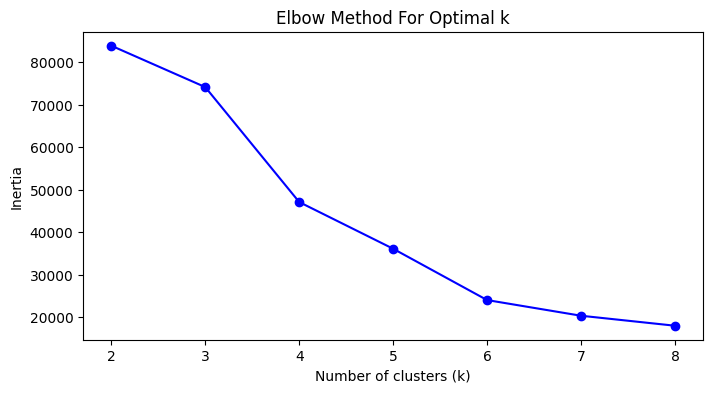

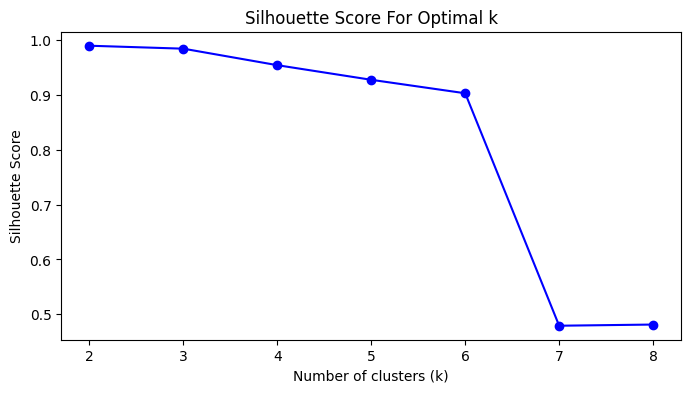

C:\Users\khaled\AppData\Local\Temp\ipykernel_21636\4221022320.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection['Cluster'] = kmeans.fit_predict(df_3)


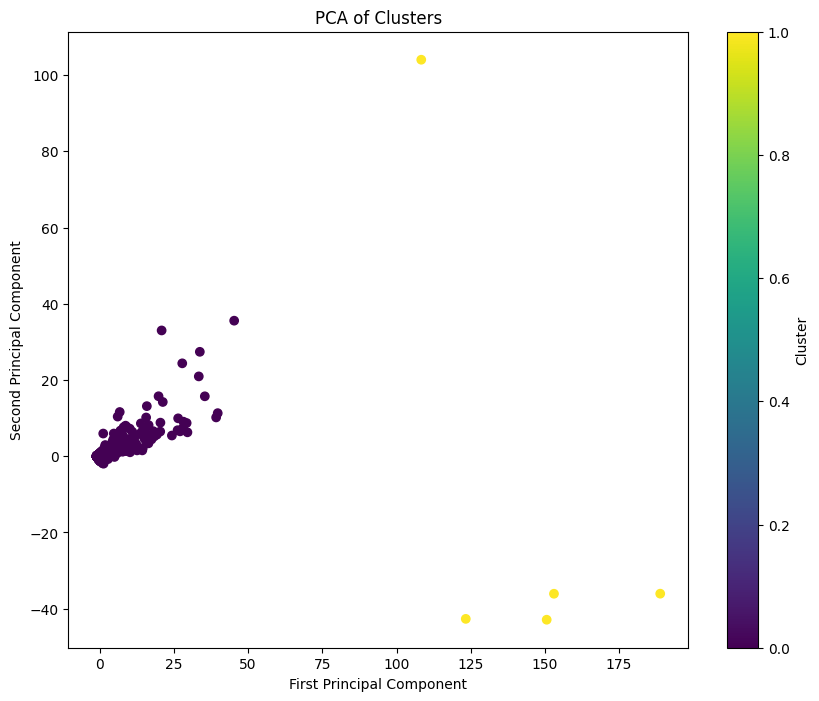

Explained variance ratio: [0.72419822 0.1341783 ]
Optimal number of clusters: 2
Silhouette Score: 0.9902589766239956
Calinski-Harabasz Index: 12648.499595352489
Davies-Bouldin Index: 0.38792050866594524
           N°DPE Date_établissement_DPE  Emission_GES_ECS  Emission_GES_chauffage  Coût_ECS_énergie_n°1  Conso_ECS_é_finale  Conso_éclairage_é_finale  Coût_refroidissement_dépensier  Emission_GES_refroidissement_dépensier  Conso_5_usages_par_m²_é_primaire  Coût_refroidissement  Coût_ECS_dépensier  Emission_GES_auxiliaires  Emission_GES_éclairage  Conso_refroidissement_dépensier_é_finale  Conso_ECS_dépensier_é_finale  Version_DPE  Coût_ECS  Surface_habitable_immeuble  Coût_éclairage  Conso_refroidissement_é_finale  Conso_éclairage_é_primaire  Conso_ECS_é_primaire  Emission_GES_5_usages_énergie_n°1  Conso_5_usages_é_finale_énergie_n°1  Conso_auxiliaires_é_primaire  Conso_auxiliaires_é_finale  Conso_chauffage_é_finale  Coût_chauffage_dépensier  Conso_refroidissement_dépensier_é_primaire  C

In [122]:
# Initialize variables for storing inertia and silhouette scores
inertia = []
silhouette_scores = []

# Try different numbers of clusters
K = range(2, 9)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_3)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_3, labels))

# Plot inertia vs. number of clusters (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette score vs. number of clusters
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

# Select the optimal number of clusters based on the best silhouette score
optimal_k = K[np.argmax(silhouette_scores)]

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_selection['Cluster'] = kmeans.fit_predict(df_3)

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_3)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_selection['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Calculate and print clustering metrics
silhouette_avg = silhouette_score(df_3, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(df_3, kmeans.labels_)
davies_bouldin = davies_bouldin_score(df_3, kmeans.labels_)

print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Display the DataFrame with clusters
print(df_selection.head())
print(df_selection["Cluster"].value_counts())


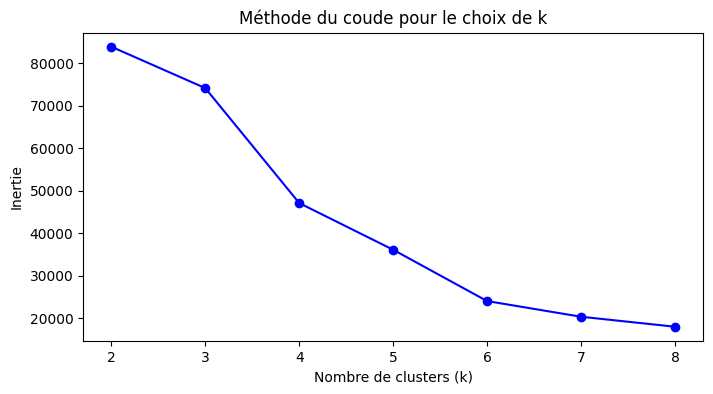

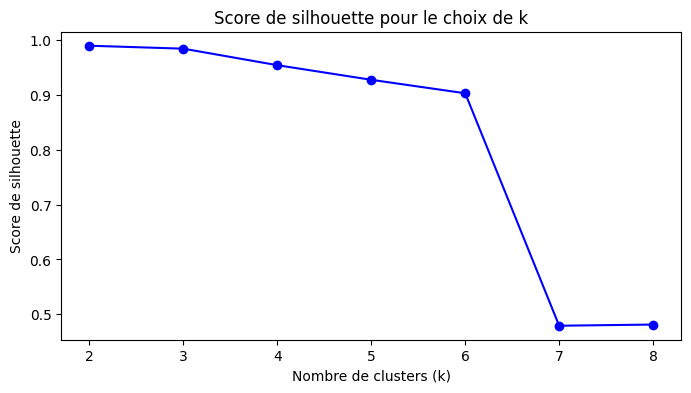

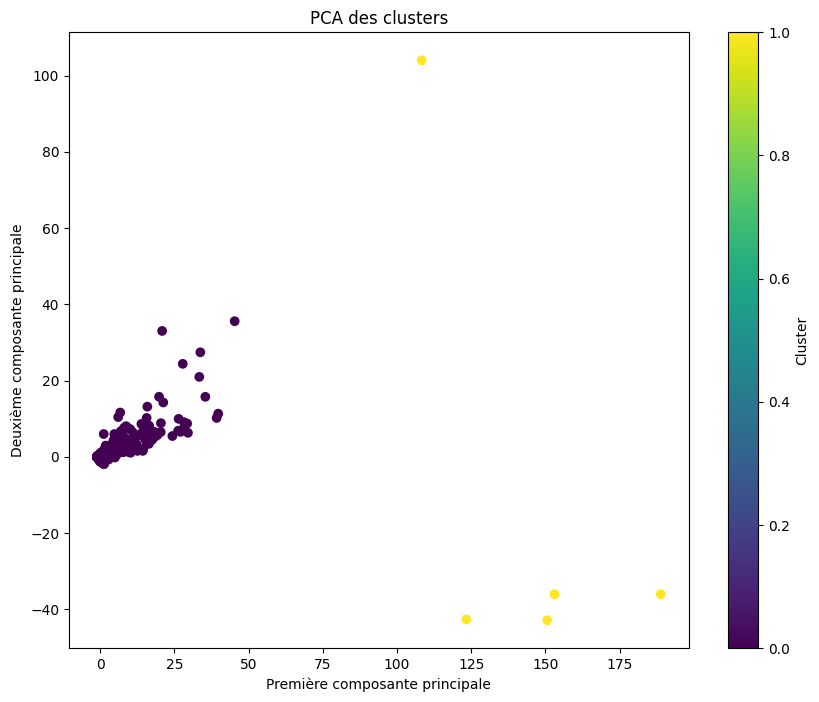

Ratio de variance expliquée : [0.72419822 0.1341783 ]
Nombre optimal de clusters : 2
Score de silhouette : 0.9902589766239956
Indice de Calinski-Harabasz : 12648.499595352489
Indice de Davies-Bouldin : 0.38792050866594524
           N°DPE Date_établissement_DPE  Emission_GES_ECS  Emission_GES_chauffage  Coût_ECS_énergie_n°1  Conso_ECS_é_finale  Conso_éclairage_é_finale  Coût_refroidissement_dépensier  Emission_GES_refroidissement_dépensier  Conso_5_usages_par_m²_é_primaire  Coût_refroidissement  Coût_ECS_dépensier  Emission_GES_auxiliaires  Emission_GES_éclairage  Conso_refroidissement_dépensier_é_finale  Conso_ECS_dépensier_é_finale  Version_DPE  Coût_ECS  Surface_habitable_immeuble  Coût_éclairage  Conso_refroidissement_é_finale  Conso_éclairage_é_primaire  Conso_ECS_é_primaire  Emission_GES_5_usages_énergie_n°1  Conso_5_usages_é_finale_énergie_n°1  Conso_auxiliaires_é_primaire  Conso_auxiliaires_é_finale  Conso_chauffage_é_finale  Coût_chauffage_dépensier  Conso_refroidissement_dépe

In [125]:
import pandas as pd
import requests
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Configuration d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Télécharger les données
url = 'https://koumoul.com/data-fair/api/v1/datasets/dpe-v2-logements-neufs/lines?size=10000&format=json'
response = requests.get(url)

if response.status_code == 200:
    try:
        data = response.json()
        df = pd.json_normalize(data['results'])
    except ValueError as e:
        print("Erreur lors de l'analyse du JSON :", e)
else:
    print("Échec de la récupération des données. Code d'état :", response.status_code)
    print("Contenu de la réponse :", response.text)
    df = pd.DataFrame()  # Initialiser un DataFrame vide en cas d'échec

# Analyse des valeurs manquantes
def analyze_missing_values(df):
    null_counts = df.isna().sum()
    null_percentages = (null_counts / len(df)) * 100
    return pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})

null_df = analyze_missing_values(df)
filtered_null_df = null_df[null_df['Null Percentage'] < 30]

# Calcul des écarts
df['Ecart_conso_5_usages'] = df['Conso_5_usages_é_primaire'] - df['Conso_5_usages_é_finale']
df['Ecart_conso_5_usages/m2'] = df['Conso_5_usages_par_m²_é_primaire'] - df['Conso_5_usages/m²_é_finale']

# Sélection des colonnes
colonnes_a_selectionner = [
    'N°DPE', 'Date_établissement_DPE', 'Emission_GES_ECS', 'Emission_GES_chauffage',
    'Coût_ECS_énergie_n°1', 'Conso_ECS_é_finale', 'Conso_éclairage_é_finale',
    'Coût_refroidissement_dépensier', 'Emission_GES_refroidissement_dépensier',
    'Conso_5_usages_par_m²_é_primaire', 'Coût_refroidissement', 'Coût_ECS_dépensier',
    'Emission_GES_auxiliaires', 'Emission_GES_éclairage', 'Conso_refroidissement_dépensier_é_finale',
    'Conso_ECS_dépensier_é_finale', 'Version_DPE', 'Coût_ECS', 'Surface_habitable_immeuble',
    'Coût_éclairage', 'Conso_refroidissement_é_finale', 'Conso_éclairage_é_primaire',
    'Conso_ECS_é_primaire', 'Emission_GES_5_usages_énergie_n°1', 'Conso_5_usages_é_finale_énergie_n°1',
    'Conso_auxiliaires_é_primaire', 'Conso_auxiliaires_é_finale', 'Conso_chauffage_é_finale',
    'Coût_chauffage_dépensier', 'Conso_refroidissement_dépensier_é_primaire',
    'Coût_chauffage_énergie_n°1', 'Hauteur_sous-plafond', 'Coût_auxiliaires', 'Score_BAN',
    'Emission_GES_refroidissement', 'Conso_5_usages_é_primaire', 'Conso_5_usages_é_finale',
    'Conso_5_usages_par_m²_é_primaire', 'Conso_5_usages/m²_é_finale', 'Coût_total_5_usages',
    'Coût_chauffage', 'Ecart_conso_5_usages', 'Ecart_conso_5_usages/m2', 'Emission_GES_5_usages',
    'Emission_GES_5_usages_par_m²', 'Ubat_W/m²_K', 'Surface_habitable_logement',
    'Conso_chauffage_dépensier_é_finale', 'Emission_GES_chauffage_dépensier', 'Conso_chauffage_é_primaire',
    'Type_énergie_n°1', 'Nom__commune_(BAN)', 'Code_postal_(BAN)', 'Date_fin_validité_DPE',
    'Type_bâtiment', 'Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries',
    'Qualité_isolation_murs', 'Etiquette_GES', 'Etiquette_DPE', 'Nom__commune_(Brut)',
    'Qualité_isolation_plancher_bas', 'Catégorie_ENR'
]

df_selection = df[colonnes_a_selectionner].copy()

# Préparation pour le clustering
clustering_columns = [
    'Conso_5_usages_é_primaire', 'Conso_5_usages_é_finale', 'Ecart_conso_5_usages',
    'Conso_5_usages_par_m²_é_primaire', 'Conso_5_usages/m²_é_finale', 'Ecart_conso_5_usages/m2',
    'Coût_total_5_usages', 'Coût_chauffage', 'Emission_GES_5_usages',
    'Emission_GES_5_usages_par_m²', 'Ubat_W/m²_K', 'Surface_habitable_logement',
    'Conso_chauffage_dépensier_é_finale', 'Emission_GES_chauffage_dépensier',
    'Conso_chauffage_é_primaire', 'Conso_chauffage_é_finale', 'Coût_chauffage_dépensier',
    'Coût_chauffage_énergie_n°1', 'Conso_chauffage_dépensier_é_primaire'
]

df_clustering = df[clustering_columns].copy()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
df_clustering = pd.DataFrame(imputer.fit_transform(df_clustering), columns=clustering_columns)

# Standardisation des données
scaler = StandardScaler()
df_clustering_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=clustering_columns)

# Clustering avec KMeans
inertia = []
silhouette_scores = []
K = range(2, 9)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_clustering_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_clustering_scaled, labels))

# Visualisation de la méthode du coude
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour le choix de k')
plt.show()

# Visualisation des scores de silhouette
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour le choix de k')
plt.show()

# Sélection du nombre optimal de clusters
optimal_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_selection['Cluster'] = kmeans.fit_predict(df_clustering_scaled)

# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_clustering_scaled)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_selection['Cluster'], cmap='viridis')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('PCA des clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Imprimer le ratio de variance expliquée
print("Ratio de variance expliquée :", pca.explained_variance_ratio_)

# Évaluation des clusters
silhouette_avg = silhouette_score(df_clustering_scaled, df_selection['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_clustering_scaled, df_selection['Cluster'])
davies_bouldin = davies_bouldin_score(df_clustering_scaled, df_selection['Cluster'])

print(f"Nombre optimal de clusters : {optimal_k}")
print(f"Score de silhouette : {silhouette_avg}")
print(f"Indice de Calinski-Harabasz : {calinski_harabasz}")
print(f"Indice de Davies-Bouldin : {davies_bouldin}")

# # Afficher les résultats du DataFrame avec les clusters
# print(df_selection.head())
# print(df_selection['Cluster'].value_counts())


# Save the DataFrame with clusters to a CSV file
output_file = 'data/df_with_clusters.csv'
df_selection.to_csv(output_file, index=False)
print(f"DataFrame with clusters saved to {output_file}")

# Display the DataFrame with clusters
print(df_selection.head())
print(df_selection["Cluster"].value_counts())
